In [22]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc


In [23]:
def plot_cycle(disch, chrg, press, channel, style=None, n=None, leg='', endp=None):
    color= 'xkcd:ocean blue'
    if n==None:
        n=2
#     color='#045a8d'
#     color='xkcd:cerulean'
    #find currents for charge and discharge and //normalize by area
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    print('discharge current (mA): ' +str(disc_i))
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]
    if style ==None:
        style = 'solid'
        
    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    #fig, (ax, ax3)= plt.subplots(2, sharex=True, figsize= (9,10)) 
    #fig, ax= plt.subplots( figsize=(8.275,5))
    fig, ax= plt.subplots( figsize=(7,5))
    ax2 = ax.twinx()
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='y', which='major', labelsize=15)
    
    ax.plot(x1, y1, c=color, linestyle=style, label=leg, linewidth=2)
    if (str(disch) != str(chrg)):
        ax.plot(x2, y2, c=color, linestyle=style, label='', linewidth=2)
    #ax.plot([0.01,cap],[2.27,2.27], c='k', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0,-cap*3.6/n/96485*10**6]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap -(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1-1]-umoles[st_p2]
    print((disch_cap.iloc[-1]*3.6/96485/(umoles[end_p1]*10**(-6))))
    line1, = ax2.plot(x, y, 'k-' , label= str(n)+' e$^-$/O$_2$',linewidth= 2, linestyle = '--')
    if endp ==True:
        end_p1 = end_p1-4
        gap = umoles[end_p1-3]-umoles[st_p2]
    ax2.plot(disch_cap[st_p1:end_p1], (umoles)[st_p1:end_p1], 'o', color='#001933', label='discharge', linewidth=3, markevery=(0.0,0.02))# (0,(6,6))) # color '#9E0003' '#ec7014'
    if (str(disch) != str(chrg)):
        ax2.plot(char_cap[st_p2:end_p2+1], (umoles)[st_p2:end_p2+1]+gap, 'o', mfc='white', color='#001933', label='charge', linewidth=3, markevery=(0.0,0.02))# (0,(6,6)))
    
    
    #slope_c, int_c = np.polyfit(char_cap[st_p2:end_p2], umoles[st_p2:end_p2], 1)
    #epermol_c = 1/(slope_c/3.6*96485/10**6)
    #slope_dis, int_dis = np.polyfit(disch_cap[st_p1:end_p1], umoles[st_p1:end_p1], 1)
    #epermol_d = -1/(slope_dis/3.6*96485/10**6)
    
    ax2.legend(fontsize=14,  loc='upper right')
    ax.set_ylabel('Voltage (V vs. Zn/Zn$^{2+}$)', color=color, fontsize=20)
    ax.set_xlabel('Capacity (mAh)', fontsize=20)
    ax2.set_ylabel('n$_{gas}$ ($\mu$mol)', fontsize=20)
    plt.tight_layout()
    #ax.set_ylim([0,3.5])
    print("o2 consumed: "+ str(umoles[st_p1]-(umoles[end_p1] )))
    print("o2 evolved: "+ str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2]-(umoles[st_p2+1]))/(umoles[st_p1]-(umoles[end_p1])))

    epermol_c = cap * 3.6 / 96485 *10**6 / (umoles[end_p2-1]-(umoles[st_p2+1]))
    epermol_d = cap * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1]))
    
    print('e per mol on discharge = ' + str(epermol_d))
    #print('e per mol on charge = ' + str(epermol_c))
    


    return 

discharge current (mA): -0.500012131769437
-1.1446699961905968
o2 consumed: 122.05189931825939
o2 evolved: 4.7924947392233435
0.03926603982398142
e per mol on discharge = 0.30571247396546936


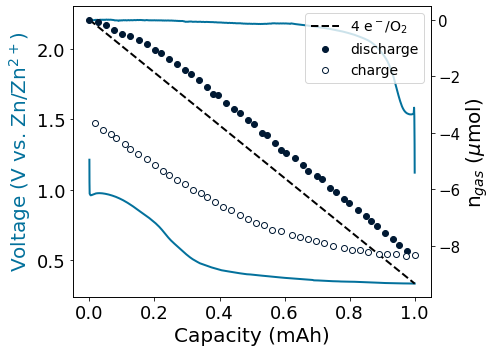

In [24]:
mno2cycle = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211122_Zn_XC72_MnO2_electrode_cycle_500uA/211122_Zn_XC72_MnO2_electrode_cycle_500uA_p_Ch4__2021-11-22_12.51_03.txt')
mno2cycle_fold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211122_Zn_XC72_MnO2_electrode_cycle_500uA/')

plot_cycle(mno2cycle_fold[1], mno2cycle_fold[3], mno2cycle, 4, n=4)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211122_Zn_XC72_MnO2_electrode_cycle_500uA/211122_XC72_MnO2_cycle.png', transparent = True, dpi=600, bbox_inches='tight')





discharge current (mA): -0.5000050906349207
-9.482662393671474
o2 consumed: 14.741825401217582
o2 evolved: 8.103525270661237
0.5496961909474207
e per mol on discharge = 2.5310836358008655
discharge current (mA): -0.49999445492788464
-29.460758534289003
o2 consumed: 1.3111735285689292
o2 evolved: -1.2606963678217085
-0.9615023033584932
e per mol on discharge = 28.45686541113987
discharge current (mA): -0.4999848425797872
-7.556195988805312
o2 consumed: 12.79634416640127
o2 evolved: 5.5356719848718114
0.43259792897775856
e per mol on discharge = 2.915766741515524


Text(0.5, 1.02, 'Mn(3,4)Ox electrode with 500uA current')

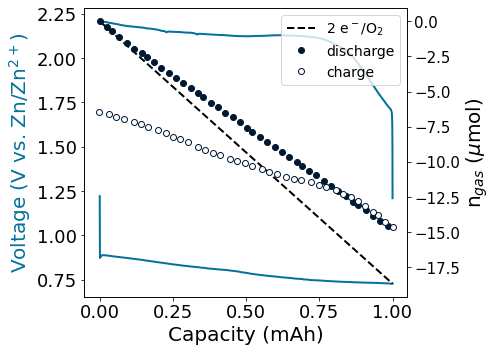

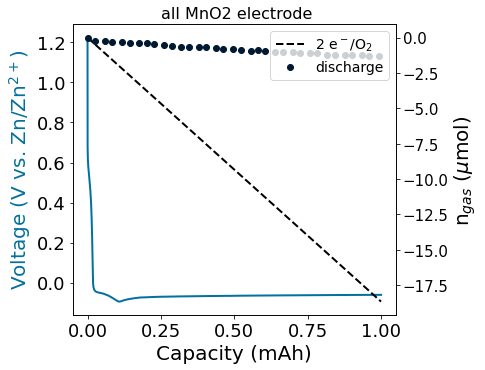

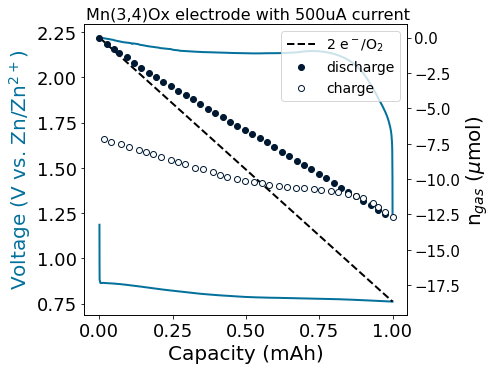

In [4]:
tio2_1_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211129_Zn_XC72_TiO2_anatase_electrode_cycle_500uA/211129_Zn_XC72_TiO2_anatase_electrode_cycle_500uA_Ch4__2021-11-29_11.54_36.txt')
tio2_1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211129_Zn_XC72_TiO2_anatase_electrode_cycle_500uA/')
plot_cycle(tio2_1[1], tio2_1[3], tio2_1_p, 4, n=2)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211129_Zn_XC72_TiO2_anatase_electrode_cycle_500uA/211129_XC72_TiO2_anatase_cycle.png', transparent = True, dpi=600, bbox_inches='tight')



allMnO2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211130_Zn_allMnO2_electrode_cycle_500uA/211130_Zn_allMnO2_electrode_cycle_500uA_Ch4__2021-11-30_09.13_05.txt')
allMnO2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211130_Zn_allMnO2_electrode_cycle_500uA/')

plot_cycle(allMnO2[1], allMnO2[1], allMnO2_p, 4, n=2)
plt.suptitle('all MnO2 electrode', fontsize=16, y=1.02)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211130_Zn_allMnO2_electrode_cycle_500uA/211130_Zn_allMnO2_electrode_cycle_500uA.png', transparent = True, dpi=600, bbox_inches='tight')



mn34oxide_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211206_Zn_Mn(2,3)Ox_electrode_cycle_500uA/211206_Zn_Mn(2,3)Ox_electrode_cycle_500uA_Ch4__2021-12-06_15.37_17.txt')
mn34oxide_fold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211206_Zn_Mn(2,3)Ox_electrode_cycle_500uA/')

plot_cycle(mn34oxide_fold[1], mn34oxide_fold[3], mn34oxide_p, 4, n=2)
plt.suptitle('Mn(3,4)Ox electrode with 500uA current', fontsize=16, y=1.02)


#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211206_Zn_Mn(2,3)Ox_electrode_cycle_500uA/211206_Zn_Mn(2,3)Ox_electrode_cycle.png', transparent = True, dpi=600, bbox_inches='tight')



discharge current (mA): -0.04993290941465517
-1.242664175542526
o2 consumed: 41.102979967281556
o2 evolved: 1.174988801453381
0.02858646264549883
e per mol on discharge = 0.2881265860665733


(3.85, 3.95)

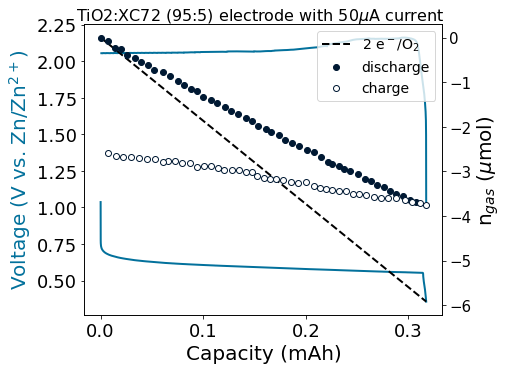

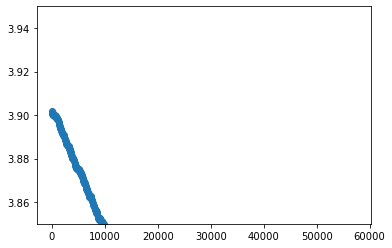

In [5]:
tiO2_95_xc72_5_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211213_Zn_95TiO2_5XC72_cycle/211213_Zn_95TiO2_5XC72_cycle_Ch4_2ndtrial.txt')
tiO2_95_xc72_5_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211213_Zn_95TiO2_5XC72_cycle/')

plot_cycle(tiO2_95_xc72_5_ec[6], tiO2_95_xc72_5_ec[8], tiO2_95_xc72_5_p, 4, n=2, endp = True)
plt.suptitle('TiO2:XC72 (95:5) electrode with 50$\mu$A current', fontsize=16, y=1.02)

plt.figure()
plt.plot(tiO2_95_xc72_5_p['time/s'], tiO2_95_xc72_5_p['pressure/torr']/(tiO2_95_xc72_5_p['temperature/C']+273), 'o')
#plt.xlim(-600, 120*60)
plt.ylim(3.85,3.95)
# plt.ylim(1140,1160)

discharge current (mA): -0.49999764168900807
-9.764049819784562
o2 consumed: 14.299957857642966
o2 evolved: 7.32281653933093
0.5120865818088457
e per mol on discharge = 2.609232571595696
discharge current (mA): -0.4999757634398035
-13.697582426415586
o2 consumed: 8.15287987144039
o2 evolved: 4.168343257907239
0.5112724980174161
e per mol on discharge = 4.576332288177282
discharge current (mA): -0.499953954366925
-8.281704799169544
o2 consumed: 18.383127474605303
o2 evolved: 12.409532571211741
0.6750501288942502
e per mol on discharge = 2.0295341673328804
0.4443555134769588


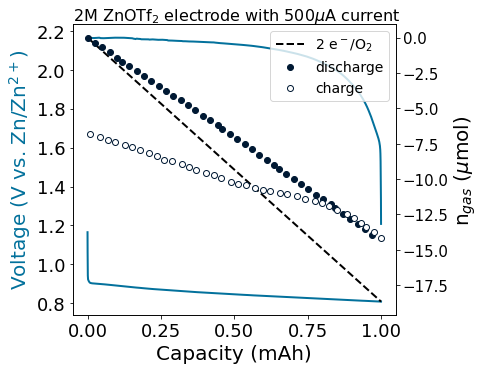

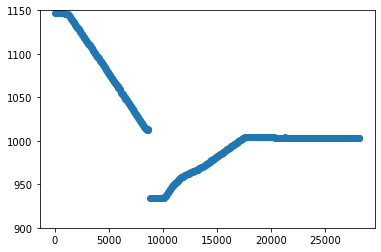

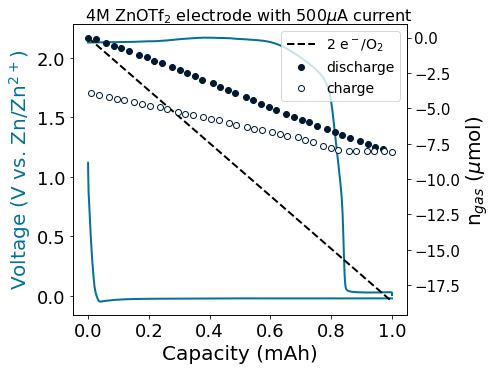

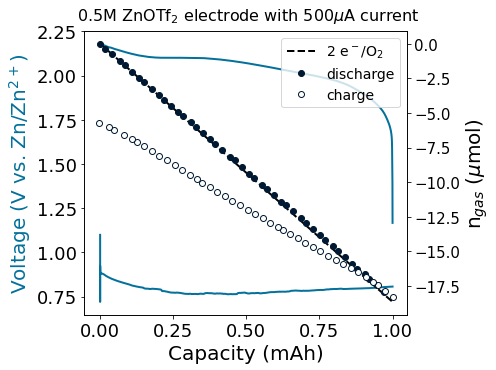

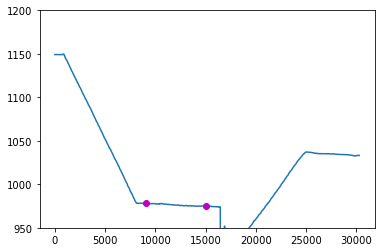

In [6]:
znotf2_2M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211211_Zn_2M_ZnOTf2_cycle_500uA/211211_Zn_2M_ZnOTf2_cycle_500uA_Ch3__2021-12-11_13.17_23.txt')
znotf2_2M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211211_Zn_2M_ZnOTf2_cycle_500uA/')
plot_cycle(znotf2_2M_ec[1], znotf2_2M_ec[3], znotf2_2M_p, 4, n=2)
plt.suptitle('2M ZnOTf$_2$ electrode with 500$\mu$A current', fontsize=16, y=1.02)

plt.figure()
plt.plot(znotf2_2M_p['time/s'], znotf2_2M_p['pressure/torr'], 'o')
plt.ylim(900,1150)

znotf2_4M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211211_Zn_4M_ZnOTf2_cycle_500uA/211211_Zn_4M_ZnOTf2_cycle_500uA_Ch4__2021-12-11_13.32_47.txt')
znotf2_4M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211211_Zn_4M_ZnOTf2_cycle_500uA/')
plot_cycle(znotf2_4M_ec[1], znotf2_4M_ec[3], znotf2_4M_p, 4, n=2)
plt.suptitle('4M ZnOTf$_2$ electrode with 500$\mu$A current', fontsize=16, y=1.02)

znotf2_0_5M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211216_Zn_0-5M_ZnOTf2_cycle_500uA/211216_Zn_0-5M_ZnOTf2_cycle_500uA_Ch4__2021-12-16_12.20_29.txt')
znotf2_0_5M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211216_Zn_0-5M_ZnOTf2_cycle_500uA/')
plot_cycle(znotf2_0_5M_ec[1], znotf2_0_5M_ec[3], znotf2_0_5M_p, 4, n=2)
plt.suptitle('0.5M ZnOTf$_2$ electrode with 500$\mu$A current', fontsize=16, y=1.02)

plt.figure()
plt.plot(znotf2_0_5M_p['time/s'], znotf2_0_5M_p['pressure/torr'])
plt.ylim(950,1200)

plt.plot(znotf2_0_5M_p['time/s'].iloc[150], znotf2_0_5M_p['pressure/torr'].iloc[150], 'mo')
plt.plot(znotf2_0_5M_p['time/s'].iloc[250], znotf2_0_5M_p['pressure/torr'].iloc[250], 'mo')


p1 = znotf2_0_5M_p['pressure/torr'].iloc[150]
t1 = znotf2_0_5M_p['temperature/C'].iloc[150]
time1 = znotf2_0_5M_p['time/s'].iloc[150]/60

p2 = znotf2_0_5M_p['pressure/torr'].iloc[250]
t2 = znotf2_0_5M_p['temperature/C'].iloc[250]
time2 = znotf2_0_5M_p['time/s'].iloc[250]/60
leak_rate =  (p1-p2)/760*headspace(4)/((t1-t2)+273) /0.082057/ (time2-time1)
print(leak_rate*120)


discharge current (mA): -0.5000162462140992
-8.469433492585619
o2 consumed: 15.396377899595365
o2 evolved: 8.132199131874316
0.5281891094715232
e per mol on discharge = 2.4235563236353235


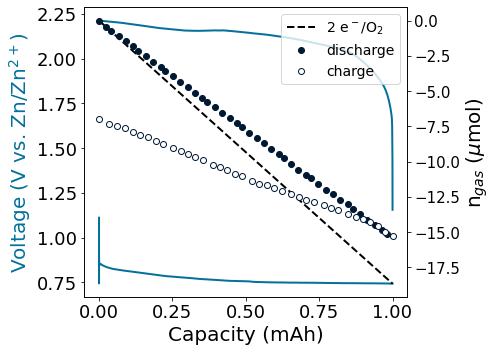

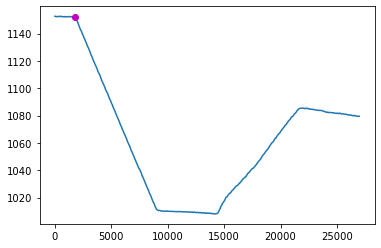

In [10]:
znotf2_0_5M_c2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211220_Zn_0-5M_ZnOTf2_cycle_500uA_test2/211220_Zn_0-5M_ZnOTf2_cycle_500uA_test2_Ch1__2021-12-20_10.21_12.txt')
znotf2_0_5M_c2_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211220_Zn_0-5M_ZnOTf2_cycle_500uA_test2/')

plot_cycle(znotf2_0_5M_c2_ec[1], znotf2_0_5M_c2_ec[3], znotf2_0_5M_c2_p, 1, n=2)

plt.figure()
plt.plot(znotf2_0_5M_c2_p['time/s'], znotf2_0_5M_c2_p['pressure/torr'])
plt.plot(znotf2_0_5M_c2_p['time/s'].iloc[30], znotf2_0_5M_c2_p['pressure/torr'].iloc[30], 'mo')



discharge current (mA): -0.499978891631016
-8.10809483864208
o2 consumed: 14.936717776219126
o2 evolved: 8.404765794123378
0.5626916113729267
e per mol on discharge = 2.4979156119687462
leak rate in umol/min:  0.004441547406101438
0.5329856887321726
discharge current (mA): -0.49997876933333335
-8.491787349827986
o2 consumed: 15.349351791325958
o2 evolved: 8.894735518631336
0.5794860681776688
e per mol on discharge = 2.430749116438259


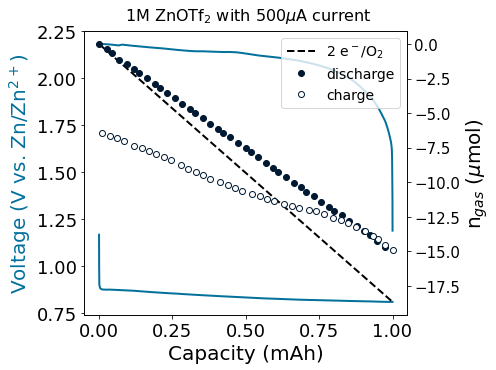

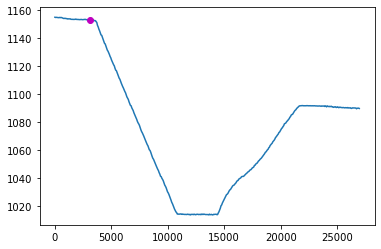

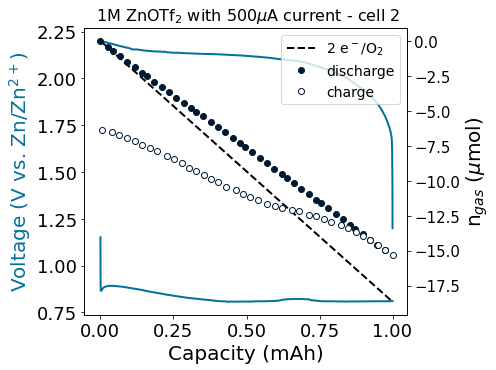

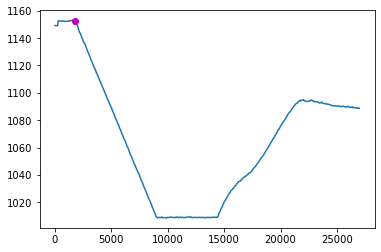

In [17]:


znotf2_1M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211216_Zn_1M_ZnOTf2_cycle_500uA/211216_Zn_1M_ZnOTf2_cycle_500uA_Ch3__2021-12-16_17.42_39.txt')
znotf2_1M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211216_Zn_1M_ZnOTf2_cycle_500uA/')

plot_cycle(znotf2_1M_ec[1], znotf2_1M_ec[3], znotf2_1M_p, 3, n=2)
plt.suptitle('1M ZnOTf$_2$ with 500$\mu$A current', fontsize=16, y=1.02)

plt.figure()
plt.plot(znotf2_1M_p['time/s'], znotf2_1M_p['pressure/torr'])
plt.plot(znotf2_1M_p['time/s'].iloc[50], znotf2_1M_p['pressure/torr'].iloc[50], 'mo')

p1 = znotf2_1M_p['pressure/torr'].iloc[50]
t1 = znotf2_1M_p['temperature/C'].iloc[50]
time1 = znotf2_1M_p['time/s'].iloc[50]/60

p2 = znotf2_1M_p['pressure/torr'].iloc[1]
t2 = znotf2_1M_p['temperature/C'].iloc[1]
time2 = znotf2_1M_p['time/s'].iloc[1]/60
leak_rate =  (p1-p2)/760*headspace(3)/((t1-t2)+273) /0.082057/ (time2-time1)

print('leak rate in umol/min: ',leak_rate)
print(leak_rate*120)


znotf2_1M_rpt_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211220_Zn_1M_ZnOTf2_cycle_500uA_test2/211220_Zn_1M_ZnOTf2_cycle_500uA_test2_Ch4__2021-12-20_10.10_40.txt')
znotf2_1M_rpt_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211220_Zn_1M_ZnOTf2_cycle_500uA_test2/')

plot_cycle(znotf2_1M_rpt_ec[1], znotf2_1M_rpt_ec[3], znotf2_1M_rpt_p, 4, n=2)
plt.suptitle('1M ZnOTf$_2$ with 500$\mu$A current - cell 2', fontsize=16, y=1.02)


plt.figure()
plt.plot(znotf2_1M_rpt_p['time/s'], znotf2_1M_rpt_p['pressure/torr'])
plt.plot(znotf2_1M_rpt_p['time/s'].iloc[30], znotf2_1M_rpt_p['pressure/torr'].iloc[30], 'mo')






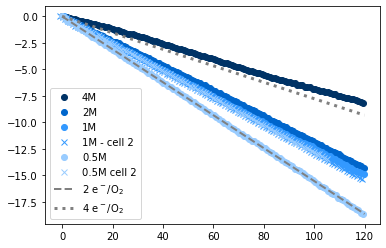

In [9]:
colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']

umoles_1M = znotf2_1M_p['pressure/torr']/760*headspace(3)/(znotf2_1M_p['temperature/C']+273)/0.082057
umoles_1M = umoles_1M- umoles_1M[60]

umoles_1M_c2 = znotf2_1M_rpt_p['pressure/torr']/760*headspace(4)/(znotf2_1M_rpt_p['temperature/C']+273)/0.082057
umoles_1M_c2 = umoles_1M_c2- umoles_1M_c2[30]

umoles_2M = znotf2_2M_p['pressure/torr']/760*headspace(4)/(znotf2_2M_p['temperature/C']+273)/0.082057
umoles_2M = umoles_2M- umoles_2M[20]

umoles_4M = znotf2_4M_p['pressure/torr']/760*headspace(4)/(znotf2_4M_p['temperature/C']+273)/0.082057
umoles_4M = umoles_4M- umoles_4M[25]

umoles_05M = znotf2_0_5M_p['pressure/torr']/760*headspace(3)/(znotf2_0_5M_p['temperature/C']+273)/0.082057
umoles_05M = umoles_05M- umoles_05M[15]

umoles_05M_c2 = znotf2_0_5M_c2_p['pressure/torr']/760*headspace(1)/(znotf2_0_5M_c2_p['temperature/C']+273)/0.082057
umoles_05M_c2 = umoles_05M_c2 - umoles_05M_c2[15]



plt.figure()

plt.plot(znotf2_4M_p['time/s'][25:145]/60-25, umoles_4M[25:145], 'o', label = '4M', color=colors[1])
plt.plot(znotf2_2M_p['time/s'][20:140]/60-20, umoles_2M[20:140], 'o', label = '2M', color=colors[2])
plt.plot(znotf2_1M_p['time/s'][60:176]/60-61, umoles_1M[60:176], 'o', label = '1M', color=colors[3])
plt.plot(znotf2_1M_rpt_p['time/s'][30:150]/60-31, umoles_1M_c2[30:150], 'x', label = '1M - cell 2', color=colors[3])


plt.plot(znotf2_0_5M_p['time/s'][15:135]/60-15, umoles_05M[15:135], 'o', label = '0.5M', color=colors[4])

plt.plot(znotf2_0_5M_c2_p['time/s'][30:135]/60-30, umoles_05M_c2[30:135], 'x', label = '0.5M cell 2', color=colors[4])


epermolx=[0,1*60*2]
epermoly=[0,-1*3.6/2/96485*10**6]
epermol_4y=[0,-1*3.6/4/96485*10**6]
plt.plot(epermolx, epermoly, '--', color = 'grey', linewidth = 2, label='2 e$^-$/O$_2$')
plt.plot(epermolx, epermol_4y, ':', color='grey', linewidth = 3, label='4 e$^-$/O$_2$')

plt.legend()



discharge current (mA): -0.5001735356498673
-7.663269696908508
o2 consumed: 14.602682802153552
o2 evolved: 7.344274234391591
0.502940064774158
e per mol on discharge = 2.5560391980878197
discharge current (mA): -0.5001419743636364
-7.4198340568333405
o2 consumed: 15.070180287959644
o2 evolved: 8.864370715604835
0.5882060165323334
e per mol on discharge = 2.4765885003212014
discharge current (mA): -0.5000723052658228
-9.265150412898516
o2 consumed: 12.045696753158936
o2 evolved: 6.317467633567475
0.5244584653777494
e per mol on discharge = 3.098019367715697


(930.0, 1180.0)

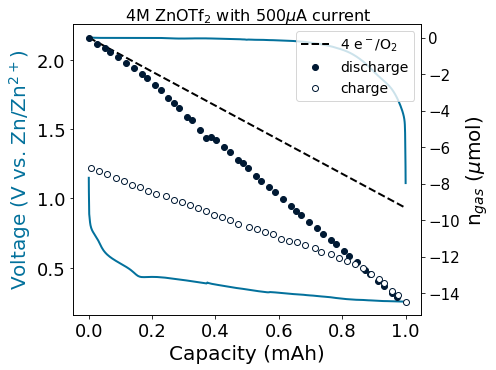

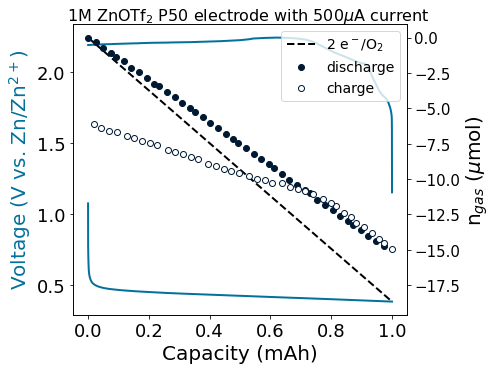

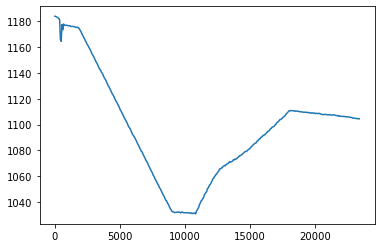

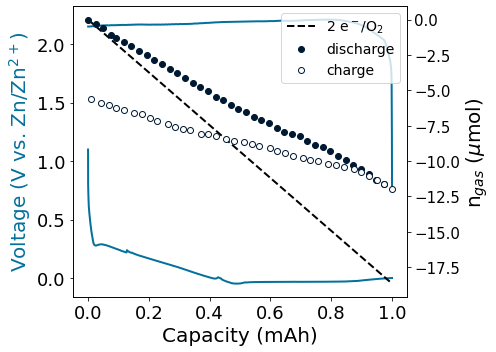

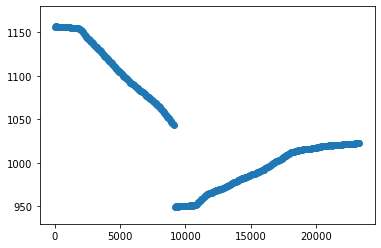

In [153]:
znotf2_4M_rpt_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220623_Zn_4M_ZnOTf2_XC72_rpt/220623_Zn_4M_ZnOTf2_XC72_rpt_p_Ch4__2022-06-23_17.52_19.txt')
znotf2_4M_rpt_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220623_Zn_4M_ZnOTf2_XC72_rpt/')

plot_cycle(znotf2_4M_rpt_ec[1], znotf2_4M_rpt_ec[3], znotf2_4M_rpt_p, 4, n=4)
plt.suptitle('4M ZnOTf$_2$ with 500$\mu$A current', fontsize=16, y=1.02)


p50_1M_rpt_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220623_Zn_1MZnOTf2_P50_rpt/220623_Zn_1MZnOTf2_P50_rpt_p_Ch3__2022-06-23_17.37_25.txt')
p50_1M_rpt_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220623_Zn_1MZnOTf2_P50_rpt/')

plot_cycle(p50_1M_rpt_ec[1], p50_1M_rpt_ec[3], p50_1M_rpt_p, 3, n=2)
plt.suptitle('1M ZnOTf$_2$ P50 electrode with 500$\mu$A current', fontsize=16, y=1.02)
plt.figure()
plt.plot( p50_1M_rpt_p['time/s'], p50_1M_rpt_p['pressure/torr'])

p50_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220627_Zn_1MZnOTf2_P50_cycle/220627_Zn_1MZnOTf2_P50_p_Ch3__2022-06-27_12.34_26.txt')
p50_2_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220627_Zn_1MZnOTf2_P50_cycle/')

plot_cycle(p50_2_ec[1], p50_2_ec[3], p50_2, 3, n=2)

plt.figure()
plt.plot( p50_2['time/s'], p50_2['pressure/torr'], 'o')
plt.ylim(930,1180)


discharge current (mA): -0.5001325888943489
-244.73036713265202
o2 consumed: 0.45602598472399336
o2 evolved: 1.5190528812716622
3.331066500938666
e per mol on discharge = 81.84191997569798


Text(0.5, 1.02, '3.5M ZnOTf$_2$ XC72 electrode with 500$\\mu$A current')

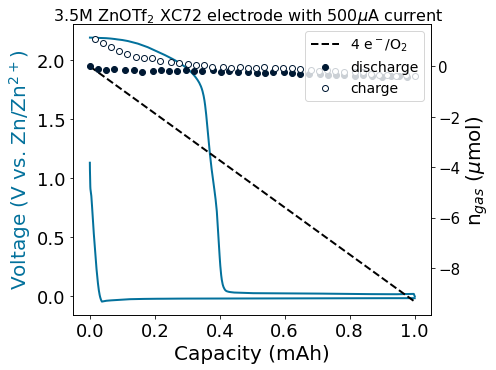

In [152]:
zinc_3_5M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220624_Zn_3-5M_ZnOTf2_XC72/220624_Zn_3-5M_ZnOTf2_XC72_p_Ch4__2022-06-24_16.18_30.txt')
zinc_3_5M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220624_Zn_3-5M_ZnOTf2_XC72/')

plot_cycle(zinc_3_5M_ec[1], zinc_3_5M_ec[3], zinc_3_5M_p, 4, n=4)
plt.suptitle('3.5M ZnOTf$_2$ XC72 electrode with 500$\mu$A current', fontsize=16, y=1.02)




discharge current (mA): -0.5000715596593673
97.5705584218075
o2 consumed: -1.1460351206706747
o2 evolved: 0.914796348784833
-0.7982271505339925
e per mol on discharge = -32.562406087196976
4.903582111111111 %


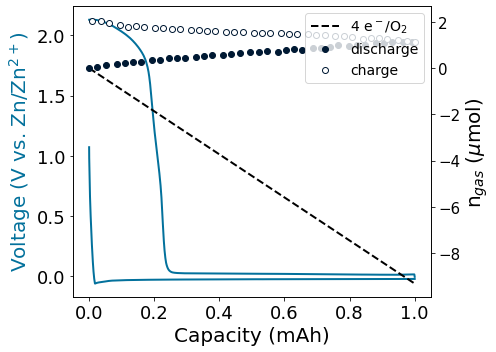

In [150]:
#argon cell
argon_zn_xc72_3_5M_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220627_Zn_3-5M_ZnOTf2_XC72_Argon/220627_Zn_3-5M_ZnOTf2_XC72_Argon_p_Ch4__2022-06-27_11.26_44.txt')
argon_zn_xc72_3_5M_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220627_Zn_3-5M_ZnOTf2_XC72_Argon/')
plot_cycle(argon_zn_xc72_3_5M_ec[1], argon_zn_xc72_3_5M_ec[3], argon_zn_xc72_3_5M_p, 4, n=4)

umoles_disch = 1.146
umoles_charge =0.9148
h2_mAh_d = umoles_disch*10**-6 * 2 *96485 /3.6
h2_mAh_c = umoles_charge*10**-6 * 2 *96485 /3.6


print(h2_mAh_c/1*100, '%')

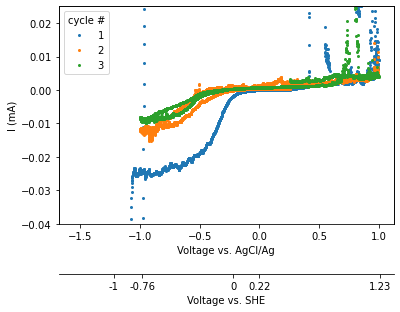

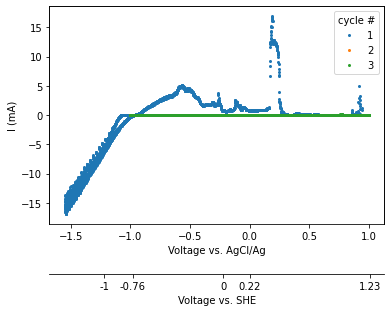

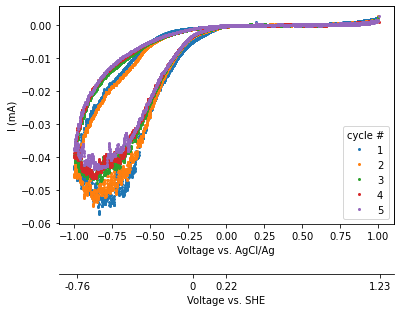

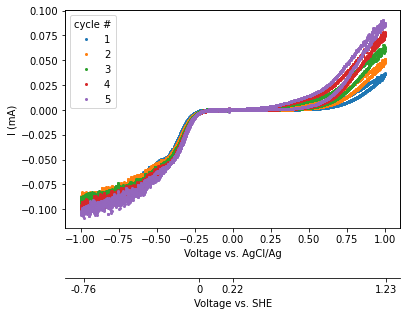

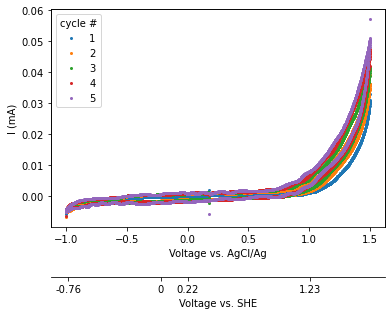

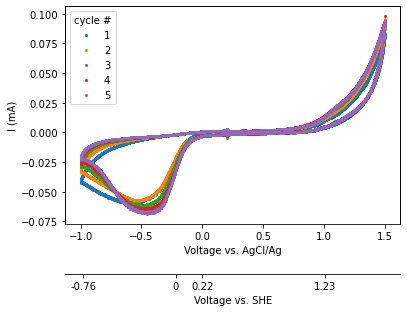

In [159]:
cv_zn = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220708_Zn_3_electrode_test_CV/')
initial=0
x=cv_zn[1]['Ewe/V']

fig, ax = plt.subplots()
ax3 = ax.twiny()
for i in range(1,4):
    df = cv_zn[1].loc[cv_zn[1]['cycle number'] == i]
    ax.plot(df['Ewe/V'][initial:], df['<I>/mA'][initial:], 'o', markersize=2, label= str(i))
ax.set_ylim(-0.04,0.025)
#plt.plot(cv_zn[1]['<Ece>/V'], cv_zn[1]['<I>/mA'])


ax.legend(title= 'cycle #')

ax.set_xlabel ('Voltage vs. AgCl/Ag')# Zn/Zn$^{2+}$')
ax.set_ylabel ('I (mA)')

she_axis = [-1, -0.76, 0, 0.22, 1.23, 2, 3]
newpos = [x-0.22 for x in she_axis]

ax3.set_xticks(newpos)
ax3.set_xticklabels(she_axis)
ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax3.spines['bottom'].set_position(('outward', 50))
ax3.set_xlabel('Voltage vs. SHE')
ax3.set_xlim(ax.get_xlim())

# ax2 = ax.twiny()
# axis_labels = [0,1]
# zn_conversion = [x-0.98 for x in axis_labels]
# ax2.set_xticks(zn_conversion)
# ax2.set_xticklabels(axis_labels)
# ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
# ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
# ax2.spines['bottom'].set_position(('outward',100))
# ax2.set_xlabel('Voltage vs. Zn/Zn$^{2+}$')


#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2021/211007_Zn_O2_OTfinH2O_solventstability_Ar_oxidativeLSV/211007_ZnOTf2stabilitywindow.png', transparent = True, dpi=600, bbox_inches='tight')

#ax.set_ylim([-2,2])


def plot_cv_zn(cv_file, metal='zn'):
    x=cv_file['Ewe/V']
    num_cycles = pd.unique(cv_file['cycle number'])
    fig, ax = plt.subplots()
    ax3 = ax.twiny()
    for i in num_cycles:
        df = cv_file.loc[cv_file['cycle number'] == i]
        ax.plot(df['Ewe/V'], df['<I>/mA'], 'o', markersize=2, label= str(int(i)))
    #ax.set_ylim(-0.12, -0.04)
    #ax.set_xlim(-1.2, 0)


    #plt.plot(cv_zn[1]['<Ece>/V'], cv_zn[1]['<I>/mA'])
    ax.legend(title = 'cycle #')

    ax.set_xlabel ('Voltage vs. AgCl/Ag')# Zn/Zn$^{2+}$')
    ax.set_ylabel ('I (mA)')

    she_axis = [-1, -0.76, 0, 0.22, 1.23, 2, 3]
    newpos = [x-0.22 for x in she_axis]

    ax3.set_xticks(newpos)
    ax3.set_xticklabels(she_axis)
    ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
    ax3.spines['bottom'].set_position(('outward', 50))
    ax3.set_xlabel('Voltage vs. SHE')
    ax3.set_xlim(ax.get_xlim())
    
    #ax2 = ax.twiny()
#     axis_labels = [0,1]
#     zn_conversion = [x-0.98 for x in axis_labels]
#     ax2.set_xticks(zn_conversion)
#     ax2.set_xticklabels(axis_labels)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward',100))
#     ax2.set_xlabel('Voltage vs. Zn/Zn$^{2+}$')




    return    

initial_zn_test = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220708_Zn_3_electrode_test_CV/')
plot_cv_zn(initial_zn_test[1])




cv_rpt_znotf= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_3electrodecell_CV/')
plot_cv_zn(cv_rpt_znotf[1])
    
    
cv_naotf_zn = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_NaOTf_3electrode_CV_EIS/')
plot_cv_zn(cv_naotf_zn[3])


cv_znotf2_argon = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/')
plot_cv_zn(cv_znotf2_argon[3]) #argon


plot_cv_zn(cv_znotf2_argon[8]) #subsequent oxygen



discharge current (mA): -0.5000969521339951
-16.589710429013422
o2 consumed: 6.730217863160945
o2 evolved: 0.4889786398148033
0.07265420670723241
e per mol on discharge = 5.545018587912165
discharge current (mA): -0.10001789756880737
-11.021662534101122
o2 consumed: 1.0546437933397783
o2 evolved: 0.0016531440319340618
0.0015674904099127075
e per mol on discharge = 1.933756248437871


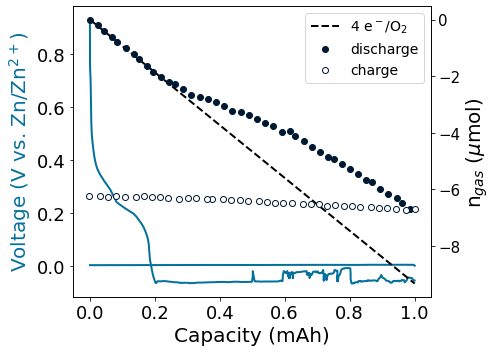

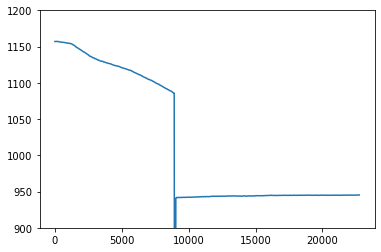

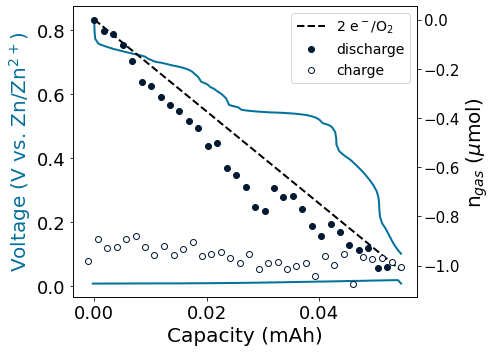

In [156]:
sodium_zn_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220712_Zn_NaOTfelectrolyte_cycle/220712_Zn_NaOTfelectrolyte_cycle_p_Ch4__2022-07-12_14.44_40.txt')
sodium_zn = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220712_Zn_NaOTfelectrolyte_cycle/')

plot_cycle(sodium_zn[1],sodium_zn[3],sodium_zn_p, 4, n=4)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220712_Zn_NaOTfelectrolyte_cycle/220712_Zn_NaOTfelectrolyte_cycle.png', transparent = True, dpi=600, bbox_inches='tight')



plt.figure()
plt.plot(sodium_zn_p['time/s'], sodium_zn_p['pressure/torr'])
plt.ylim(900,1200)


sodium_zn_100_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_NaOTf_100uA_cycle/220713_Zn_NaOTf_100uA_cycle_p_Ch4__2022-07-13_14.32_17.txt')
sodium_zn_100 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_NaOTf_100uA_cycle/')

plot_cycle(sodium_zn_100[1],sodium_zn_100[3],sodium_zn_100_p, 4, n=2)

